In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Dataset

In [6]:
# Load the Coursera dataset
data_path = '../data/Coursera.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Total courses: {len(df):,}")

Dataset loaded successfully!
Total courses: 3,522


## 2. Dataset Structure

In [7]:
# Display basic information
print("Dataset Info:")
print("=" * 60)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [8]:
# Display column names and first few rows
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()


Column Names:
['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course URL', 'Course Description', 'Skills']

First 5 rows:


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or Television,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature-length-screenplay-for-film-or-television,"Write a Full Length Feature Film Script In this course, you will write a complete, feature-leng...",Drama Comedy peering screenwriting film Document Review dialogue creative writing Writin...
1,Business Strategy: Business Model Canvas Analysis with Miro,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis-miro,"By the end of this guided project, you will be fluent in identifying and creating Business Model...",Finance business plan persona (user experience) business model canvas Planning Business pr...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-film-solar-cells,This course consists of a general presentation of solar cells based on silicon thin films. It ...,chemistry physics Solar Energy film lambda calculus Electrical Engineering electronics en...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-finance,"When it comes to numbers, there is always more than meets the eye. In operational finance, you ...",accounts receivable dupont analysis analysis Accounting Finance Operations Management Lead...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sql-queries,In this course you�ll learn how to effectively retrieve data from a relational database table us...,Data Analysis select (sql) database management systems online shopping table (database) dat...


## 3. Data Completeness

In [9]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df.to_string(index=False))

if len(missing_df) == 0:
    print("No missing values found!")

Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing Count, Missing %]
Index: []
No missing values found!


## 4. Difficulty Level Distribution

In [10]:
# Analyze difficulty levels
print("Difficulty Level Distribution:")
print("=" * 60)

difficulty_counts = df['Difficulty Level'].value_counts()
difficulty_pct = (difficulty_counts / len(df)) * 100

difficulty_df = pd.DataFrame({
    'Difficulty': difficulty_counts.index,
    'Count': difficulty_counts.values,
    'Percentage': difficulty_pct.values
})

print(difficulty_df.to_string(index=False))
print(f"\nTotal: {len(df):,} courses")

Difficulty Level Distribution:
    Difficulty  Count  Percentage
      Beginner   1444   40.999432
      Advanced   1005   28.534923
  Intermediate    837   23.764906
    Conversant    186    5.281090
Not Calibrated     50    1.419648

Total: 3,522 courses


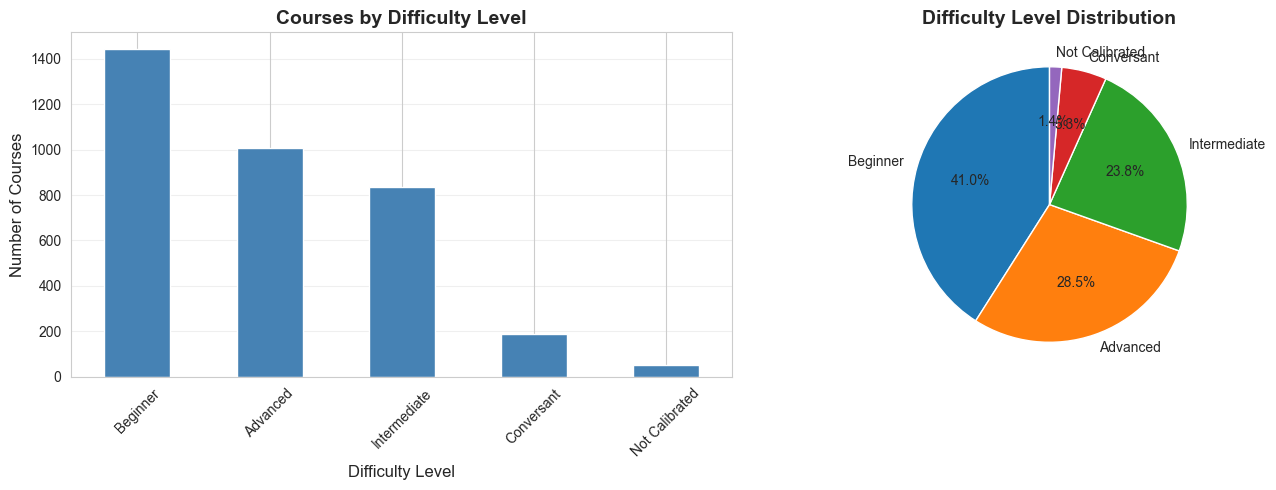

In [11]:
# Visualize difficulty distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
difficulty_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Courses by Difficulty Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Difficulty Level', fontsize=12)
ax1.set_ylabel('Number of Courses', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Pie chart
difficulty_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Difficulty Level Distribution', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## 5. Rating Distribution

Rating Statistics:
count    3440.000000
mean        4.554477
std         0.337245
min         1.000000
25%         4.500000
50%         4.600000
75%         4.800000
max         5.000000
Name: Course Rating, dtype: float64


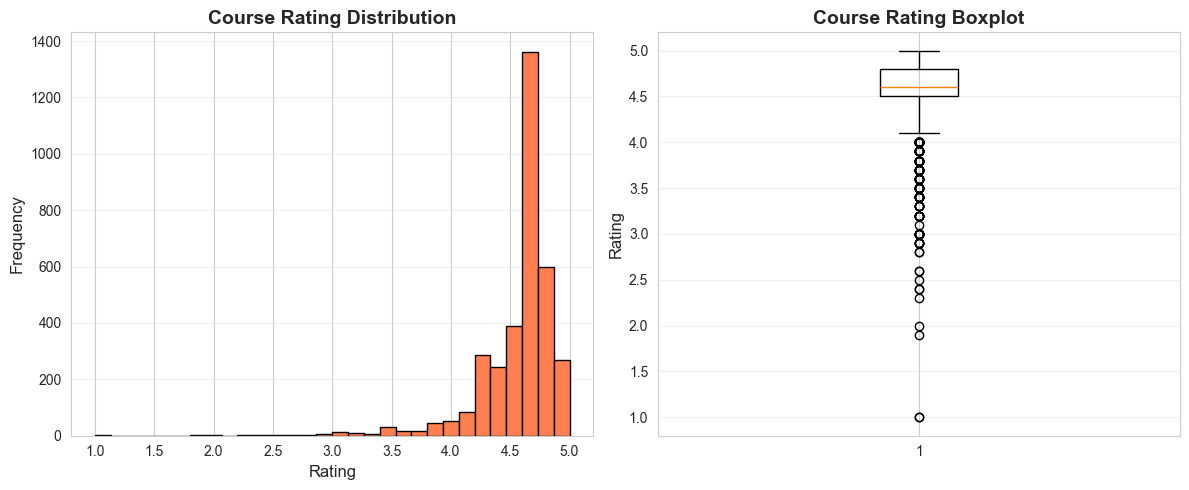

In [13]:
# Analyze course ratings
print("Rating Statistics:")
print("=" * 60)

# Convert to numeric first (ratings are stored as strings)
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')
print(df['Course Rating'].describe())

# Get clean ratings as numpy array
ratings = df['Course Rating'].dropna().to_numpy()

# Visualize rating distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ratings, bins=30, color='coral', edgecolor='black')
plt.title('Course Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(ratings)
plt.title('Course Rating Boxplot', fontsize=14, fontweight='bold')
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. University Distribution

Top 15 Universities by Course Count:
University
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Colorado Boulder                101
University of Michigan                        101
University of California, Irvine               88
Google Cloud                                   88
IBM                                            84
University of Colorado System                  83
University of California San Diego             81
University of Minnesota                        56
Duke University                                55
University of California, Davis                54
University of Virginia                         51
The State University of New York               48


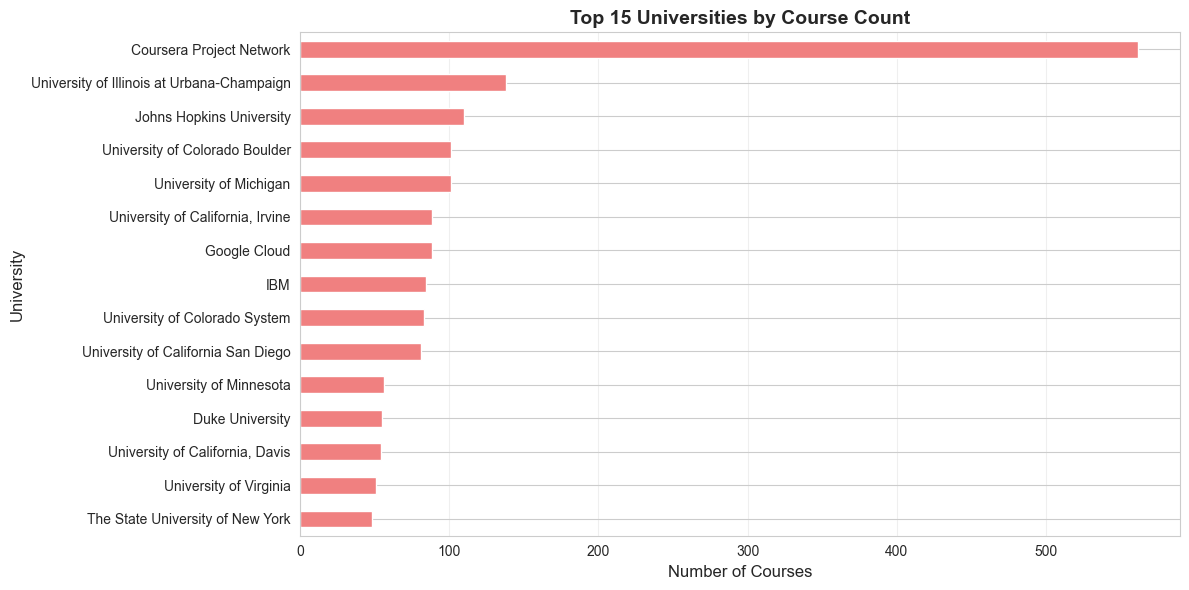

In [14]:
# Top universities by course count
print("Top 15 Universities by Course Count:")
print("=" * 60)

top_universities = df['University'].value_counts().head(15)
print(top_universities.to_string())

# Visualize
plt.figure(figsize=(12, 6))
top_universities.plot(kind='barh', color='lightcoral')
plt.title('Top 15 Universities by Course Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Courses', fontsize=12)
plt.ylabel('University', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Sample Courses by Difficulty

In [15]:
# Show sample courses from each difficulty level
difficulty_levels = df['Difficulty Level'].unique()

for level in difficulty_levels:
    print(f"\n{'='*80}")
    print(f"Sample {level} Courses")
    print(f"{'='*80}")
    
    samples = df[df['Difficulty Level'] == level].head(3)
    
    for idx, row in samples.iterrows():
        print(f"\n{row['Course Name']}")
        print(f"  University: {row['University']}")
        print(f"  Rating: {row['Course Rating']}")
        print(f"  Description: {row['Course Description'][:150]}...")


Sample Beginner Courses

Write A Feature Length Screenplay For Film Or Television
  University: Michigan State University
  Rating: 4.8
  Description: Write a Full Length Feature Film Script  In this course, you will write a complete, feature-length screenplay for film or television, be it a serious ...

Business Strategy: Business Model Canvas Analysis with Miro
  University: Coursera Project Network
  Rating: 4.8
  Description: By the end of this guided project, you will be fluent in identifying and creating Business Model Canvas solutions based on previous high-level analyse...

Retrieve Data using Single-Table SQL Queries
  University: Coursera Project Network
  Rating: 4.6
  Description: In this course you�ll learn how to effectively retrieve data from a relational database table using the SQL language.   We all know that most computer...

Sample Advanced Courses

Silicon Thin Film Solar Cells
  University: �cole Polytechnique
  Rating: 4.1
  Description: This course consists of 

## 8. Summary Statistics

In [16]:
print("\n" + "="*80)
print("DATASET SUMMARY")
print("="*80)
print(f"Total Courses: {len(df):,}")
print(f"Total Universities: {df['University'].nunique():,}")
print(f"Average Rating: {df['Course Rating'].mean():.2f}")
print(f"Median Rating: {df['Course Rating'].median():.2f}")
print(f"\nDifficulty Breakdown:")
for level, count in difficulty_counts.items():
    print(f"  {level}: {count:,} courses ({(count/len(df)*100):.1f}%)")
print("="*80)


DATASET SUMMARY
Total Courses: 3,522
Total Universities: 184
Average Rating: 4.55
Median Rating: 4.60

Difficulty Breakdown:
  Beginner: 1,444 courses (41.0%)
  Advanced: 1,005 courses (28.5%)
  Intermediate: 837 courses (23.8%)
  Conversant: 186 courses (5.3%)
  Not Calibrated: 50 courses (1.4%)
